# Timescales in the jet-ISM interactions of 4C 31.04

Relevant timescales in this problem are:
- the crossing time of the forward shock, $t_\text{fs}$
- the jet head advance time $t_\text{jh}$

The crossing time of the forward shock is relevant in assessing the possibility that
- the Fe[II] region beyond the jet lobes is accelerated by the forward shock.
- and the H$_2$ in the ring is excited by the forward shock, that has turned into a C-shock.

The VLBI jet extends to ~50 pc from the core.
The shock excited Fe[II] region extends to a radius of ~500 pc.
The H$_2$ emission extends from ~0.5 kpc to ~1.8 kpc from the center.

## Forward shock propagation time

The forward shock propagation time to sweep across the Fe[II] region is estimated in the paper from ram-pressure arguments to be approximately $t_\text{fs, Fe[II]} \approx 100$ kyr, and to reach the H$_2$ ring about $t_\text{fs, H$_2$} \approx 1$ Myr (although this depends on the molecular disc/ring geometry).


## Jet head crossing time

$$
t_\text{jh} = \frac{L}{c} \left(1 + \frac{1}{\Gamma}\sqrt{\frac{\chi}{\left(1 + \chi\right) \zeta}}\right) \left(1 - \frac{1}{\Gamma^2}\right)^{-\frac{1}{2}} \qquad\qquad \text{(1)}
$$

$\chi$
: Ratio of rest mass energy density ($\rho c^2$) to pressure of the jet plasma

$\zeta$
: Ratio of jet density to (mean) ambient density

$\Gamma$
: Lorentz factor

$L$
: Propagation distance considered

We wish to see if the jet head crossing time across 50 pc can occur on a timescale comparable to the timescale of the propagation of the forward shock through the Fe[II] region and to the H$_2$ ring.

With the code below, we plot $t_\text{jh}$ as functions of $\chi$ and $\zeta$ for various values of $\Gamma$.

In [397]:
import physconst as pc
import numpy as np
import matplotlib.pyplot as pl
import matplotlib.cm as cm
from mpl_toolkits.axes_grid1 import make_axes_locatable
import seaborn as sns

In [398]:
# Function for equation (1)

def tjh(chi=1.6, zeta=1.e5, Gamma=5., L=50.*pc.pc):
    """
    Calculate jet head crossing time according to Equation (1)
    """
    return L / pc.c * (1. + np.sqrt(chi / (1. + chi) / zeta) / Gamma) / np.sqrt((1. - 1. / Gamma ** 2))

In [399]:
# 2D solution plotting in zeta and chi space for a given value of Gamma

def plot_sol_ig(ig, ax, Gamma):
    """
    Draw desired plots in axes ax
    """
    
    # Results and temporal range of interest
    result = np.log10(tjh(chi, zeta, Gamma) / pc.kyr)
    contours = np.arange(1, 4, 0.5)
    
    # Plots
    pcm = ax.pcolormesh(np.log10(chi), np.log10(zeta), result, vmin=contours[0], vmax=contours[-1])
    cnt = ax.contour(np.log10(np.squeeze(chi)), np.log10(np.squeeze(zeta)), result, contours, cmap=cm.magma)
    
    # Labels
    
    pl.text(0.5, -3.3, r'$\Gamma = $'+str(Gamma))

    if ig > 0:
        pl.xlim(-1.99, 1.0)
        pl.yticks([])
        
    else:
        pl.xlabel(r'$\log \, \chi$')
        pl.ylabel(r'$\log \, \zeta$')
    
    if ig == len(Gammas) - 1:
        ax = divider.append_axes("right", size="5%", pad=0.1)
        cp = pl.colorbar(pcm, cax=ax)
        cc = pl.colorbar(cnt, cax=cp.ax)
        cc.set_label(r'$\log \, t_\mathrm{jh}$ [ kyr ]')
    

In [400]:
# Parameter space

zeta = np.logspace(-8, -3, 60)[:,None]
chi = np.logspace(-2, 1, 30)[None, :]
Gammas = [1.3, 2, 5, 10]

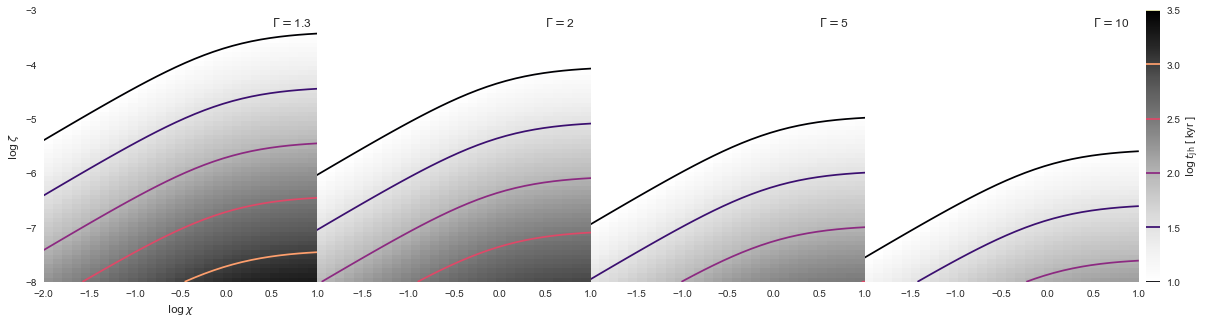

In [401]:
# Plot for various Gamma

fig = pl.figure(1, figsize=(20, 5))
ax = pl.subplot(1,1,1)
divider = make_axes_locatable(ax)

for ig, Gamma in enumerate(Gammas):
    
    plot_sol_ig(ig, ax, Gamma)  

    if ig < len(Gammas) - 1:
        ax = divider.append_axes("right", size="100%", pad=0.)
        
    


## Interpretation

In the plots above, the velve, red, and yellow contours are the regions we are interested in. We can see that there is some room for the possibility that the jet head crossing time is greater than 100 kyr. The jet needs to be very light, yet slow, and carry substantial momentum compared to its pressure. These are somewhat contradictory properties.
Whether these conditions allow for fast-propagating forward shocks as estimated above needs to be checked.

All in all, I concur that it is possible for the jet forward shock and the jet streams to affect the Fe[II] region, but unlikely for them to affect the H$_2$ ring.